In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier as OVO
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Reading the data

In [2]:
train = pd.read_csv('salju_train.csv')
test = pd.read_csv('salju_test.csv')

In [3]:
train.head()
# 109.095 rows x 24 columns

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [4]:
train.corr()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
id,1.000000,0.007520,0.004129,0.001892,-0.002019,-0.003793,-0.003330,0.001467,-0.000819,0.002330,0.002229,-0.004429,-0.004715,0.001144,0.000388,0.006948,0.004265
SuhuMin,0.007520,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.004129,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.001892,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,-0.002019,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,-0.003793,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,-0.003330,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.001467,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,-0.000819,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,0.002330,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [6]:
# Define X variable
X_train = train.drop(['id', 'Tanggal', 'KodeLokasi', 'BersaljuHariIni', 'BersaljuBesok'], axis=1)

In [7]:
X_train.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SuhuMin                   107973 non-null  float64
 1   SuhuMax                   108166 non-null  float64
 2   Hujan                     106664 non-null  float64
 3   Penguapan                 62071 non-null   float64
 4   SinarMatahari             56716 non-null   float64
 5   ArahAnginTerkencang       101351 non-null  object 
 6   KecepatanAnginTerkencang  101399 non-null  float64
 7   ArahAngin9am              101172 non-null  object 
 8   ArahAngin3pm              105898 non-null  object 
 9   KecepatanAngin9am         107742 non-null  float64
 10  KecepatanAngin3pm         106792 non-null  float64
 11  Kelembaban9am             107093 non-null  float64
 12  Kelembaban3pm             105721 non-null  float64
 13  Tekanan9am                97768 non-null   f

<AxesSubplot:>

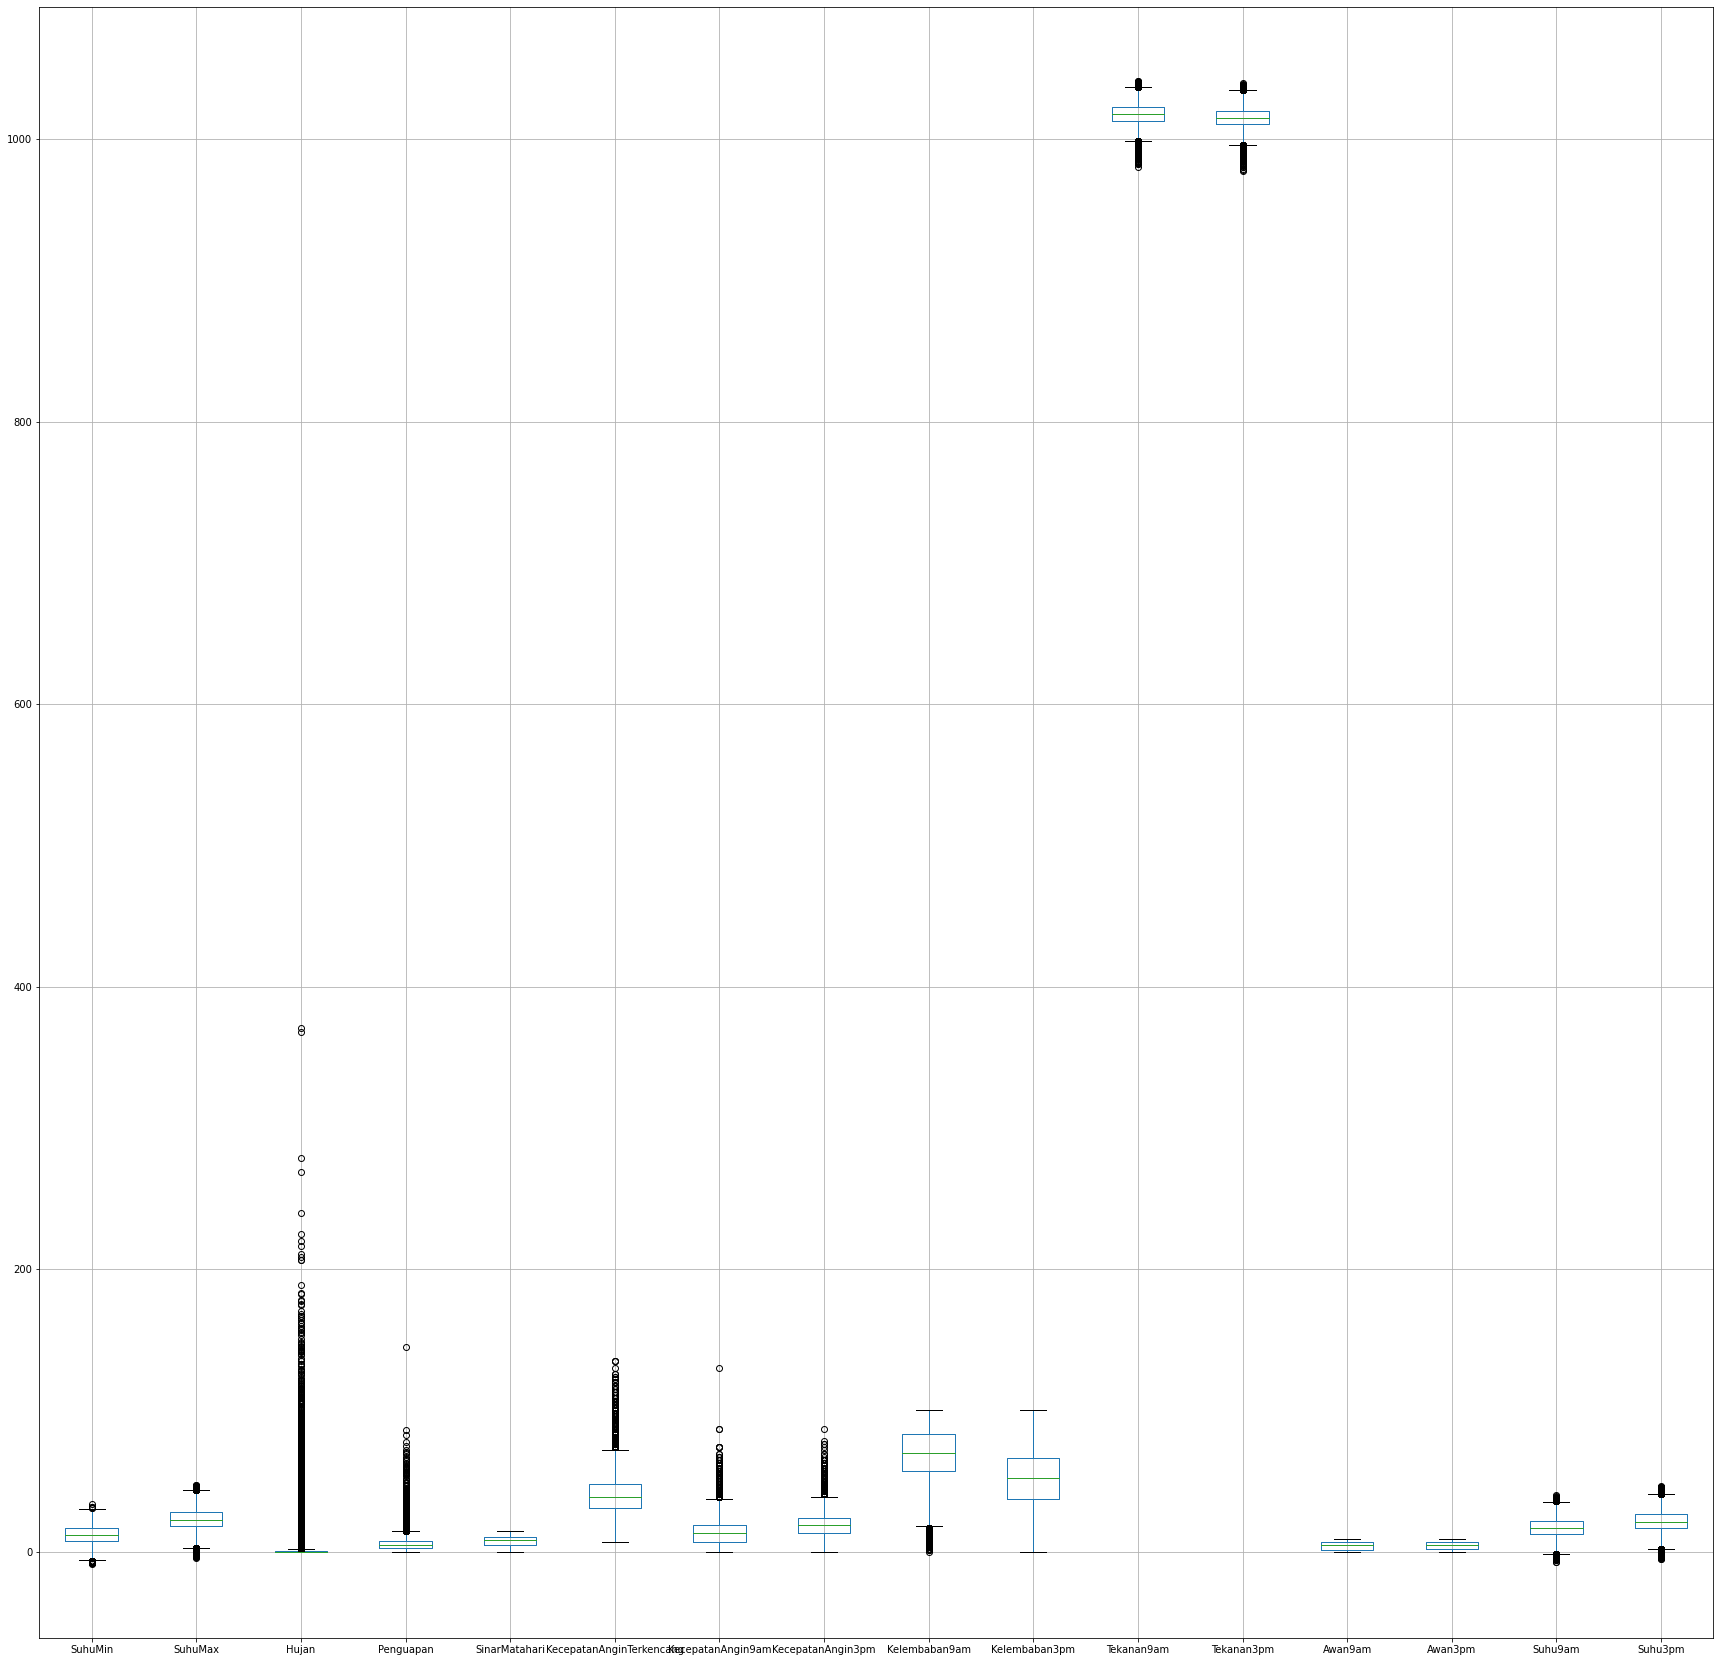

In [9]:
plt.figure(figsize=(30,30))
X_train.boxplot(column=[x for x in X_train.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1).keys()])

# Cleaning the data

Impute the null continues data with regression

In [10]:
# Define the regression imputer
imputer = IterativeImputer(BayesianRidge())

In [11]:
# Function to get imputed data
def regression_imputer():
    X = X_train.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1)
    train_new = imputer.fit_transform(X)
    train_new = pd.DataFrame(data=train_new, columns=X.keys())
    train_new = pd.concat([train_new, X_train[['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']]], axis=1)
    return train_new

In [12]:
X_train_imputed = pd.DataFrame(regression_imputer())

C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [13]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SuhuMin                   109095 non-null  float64
 1   SuhuMax                   109095 non-null  float64
 2   Hujan                     109095 non-null  float64
 3   Penguapan                 109095 non-null  float64
 4   SinarMatahari             109095 non-null  float64
 5   KecepatanAnginTerkencang  109095 non-null  float64
 6   KecepatanAngin9am         109095 non-null  float64
 7   KecepatanAngin3pm         109095 non-null  float64
 8   Kelembaban9am             109095 non-null  float64
 9   Kelembaban3pm             109095 non-null  float64
 10  Tekanan9am                109095 non-null  float64
 11  Tekanan3pm                109095 non-null  float64
 12  Awan9am                   109095 non-null  float64
 13  Awan3pm                   109095 non-null  f

Imput null categorical data with classification 

In [14]:
X_train_imputed['ArahAnginTerkencang'].unique()

array(['WSW', nan, 'ESE', 'SSW', 'N', 'SW', 'WNW', 'W', 'ENE', 'S', 'SE',
       'SSE', 'E', 'NNW', 'NW', 'NE', 'NNE'], dtype=object)

In [15]:
scaler = StandardScaler()

In [16]:
def classification_imputer_terkencang():
    
    X_notnull = X_train_imputed[X_train_imputed['ArahAnginTerkencang'].notnull()]
    y = X_notnull['ArahAnginTerkencang']
    X = X_notnull.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1)
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    Xtrain, Xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    logreg = LogisticRegression()
    logreg.fit(Xtrain, ytrain)
    y_imputed = logreg.predict(Xtest)
    
    return(accuracy_score(ytest, y_imputed))

In [17]:
classification_imputer_terkencang()

C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.15911333289482338

In [18]:
 #Imputasi kategorikal data menggunakan klasifikasi tidak memungkinkan, karena beberapa model yang dicoba mengalami underfitting.
    # Maka imputasi kategorikal data akan dilakukan dengan mengklaster data tanpa variabel ketegorikal, 
    # karena jumlah mata angin adalah sebanyak 16 
    # ['WSW', nan, 'ESE', 'SSW', 'N', 'SW', 'WNW', 'W', 'ENE', 'S', 'SE','SSE', 'E', 'NNW', 'NW', 'NE', 'NNE'],
    # maka akan dilakukan klaster metode k-means dengan k=16

In [19]:
#Berikut di bawah adalah code clustering k-means tanpa library

In [20]:
def kmeans_scratch(df, k):
    scaler.fit(df)
    df = pd.DataFrame(scaler.transform(df), columns=df.keys())
    X = np.array(df)
    
    #Initialize the centroids randomly
    init_centroids = random.sample(range(0, len(df)), k)
    
    centroids = []
    for i in init_centroids:
        centroids.append(df.loc[i])
    centroids = np.array(centroids)
    
    #Calculate the euclidean distance
    def euclidean_dist(x1, x2):
        dis = (sum(x1-x2)**2)**0.5
        return dis
    
    #Find the closest data to  centroids
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in centroids:
            distance.append(euclidean_dist(i,j))
        assigned_centroid.append(np.argmin(distance))
        
    get_closets_to_centroids = assigned_centroid
    
    #Move the centroids based on the mean of the data points
    new_centroids=[]
    cluster_df = pd.concat([pd.DataFrame(X, columns=df.keys()),X_train_imputed[['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']], pd.DataFrame(get_closets_to_centroids, columns=['cluster'])], axis=1)
    
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    
    return cluster_df, new_centroids

Imputasi kategorikal data dari klasterisasi

In [21]:
cluster_1 = kmeans_scratch(X_train_imputed.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'], axis=1) , 16)[0]
cluster_1

C:\Users\AHNAFB~1\AppData\Local\Temp/ipykernel_7200/42943989.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_mean = current_cluster.mean(axis=0)


,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,cluster
0,-0.282533,-1.088910,0.282137,-0.848164,-0.940173,-1.170699,-1.581357,-0.646584,0.476753,1.175779,0.350685,0.472303,0.675617,0.513987,-0.596856,-0.965265,WSW,NaN,WSW,15
1,-0.502272,-0.877205,0.658454,-0.669949,-0.000938,0.091132,-0.118255,0.151421,0.582282,0.451637,-0.371252,-0.107669,1.023969,0.212851,-0.782068,-0.893254,NaN,SW,WNW,14
2,0.941725,1.239851,-0.282337,0.815403,0.715364,0.310287,0.106838,0.835424,-0.367478,-0.465609,-0.309189,-0.395824,-0.322675,-0.377524,1.054618,1.137445,ESE,SE,SE,12
3,-0.769097,0.181323,-0.282337,0.893170,0.860384,1.050781,-0.118255,0.037420,-2.319764,-1.672513,0.218084,0.234366,-1.330713,1.060006,-0.257301,0.215709,SSW,N,SW,7
4,-0.988836,-0.411453,-0.282337,-0.400446,1.492020,-0.208058,0.894662,0.037420,-0.736830,-0.175952,0.291751,-0.092798,-0.938266,0.636429,-0.704897,-0.518799,N,NNW,ESE,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109090,1.239942,0.068413,-0.282337,0.569766,0.429723,0.236238,1.119754,0.835424,0.265695,0.886123,0.232818,0.338464,-0.153372,0.636429,0.776800,0.057286,ESE,SE,ESE,3
109091,0.549335,0.280119,-0.282337,0.313484,0.343473,-0.208058,1.569939,0.037420,-0.895123,0.017152,0.100217,0.130268,-0.425761,-0.178177,1.054618,0.388535,SSE,SSE,E,8
109092,-0.737706,-0.397339,-0.094179,-0.836143,-0.192967,-0.504255,-1.131171,-0.646584,1.215456,-0.031124,-0.474385,-0.702513,0.137608,0.018115,-0.674028,-0.273963,NW,N,NW,1
109093,-0.219751,0.929349,-0.282337,0.731468,1.090070,0.606485,-0.118255,0.835424,-1.792119,-1.624236,0.335951,0.070784,-1.723160,-1.481458,0.730497,1.079837,E,ESE,SE,14


In [22]:
def imput_categorical_data(klaster, arah_angin, arah):
    for i in range(len(cluster_1)):
        if (type(cluster_1[arah_angin][i] ) != str) and (cluster_1['cluster'][i] == klaster):
            cluster_1[arah_angin][i] = arah
        else:
            continue

In [23]:
# code untuk imput null categorical values
for i in range (16):
    
    for j in ['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']:
        
        sum_arah_angin_per_klaster = cluster_1.loc[cluster_1['cluster']==i, :][j].value_counts()
        
        print(sum_arah_angin_per_klaster)
        print('Klaster : ', i)
        
        for ArahAngin in sum_arah_angin_per_klaster.keys():
            if sum_arah_angin_per_klaster[ArahAngin] == np.max(sum_arah_angin_per_klaster):
                terbanyak = ArahAngin
            else:
                continue
        
        imput_categorical_data(i, j, terbanyak)
        
        print('Arah angin terbanyak adalah : ', terbanyak)
        print(' ')
    print(' ')

N      84
NW     72
NNW    63
WNW    63
W      62
SW     53
E      48
S      46
NNE    46
WSW    44
SE     43
ESE    41
ENE    41
SSE    35
NE     34
SSW    31
Name: ArahAnginTerkencang, dtype: int64
Klaster :  0


C:\Users\AHNAFB~1\AppData\Local\Temp/ipykernel_7200/2816461607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1[arah_angin][i] = arah


Arah angin terbanyak adalah :  N
 
N      71
NW     60
NNW    60
E      53
NE     53
ESE    52
WNW    47
NNE    47
ENE    42
SW     41
S      38
SE     34
SSW    33
SSE    32
W      31
WSW    25
Name: ArahAngin9am, dtype: int64
Klaster :  0
Arah angin terbanyak adalah :  N
 
NW     81
NNW    81
N      73
WNW    70
SE     65
W      64
NE     52
NNE    50
SSE    47
WSW    45
SW     44
E      37
S      36
SSW    36
ESE    32
ENE    30
Name: ArahAngin3pm, dtype: int64
Klaster :  0
Arah angin terbanyak adalah :  NNW
 
 
W      841
N      736
NW     704
WSW    687
SW     635
WNW    633
NNW    632
SSW    446
E      414
NNE    412
SSE    411
ENE    408
S      397
NE     387
SE     382
ESE    352
Name: ArahAnginTerkencang, dtype: int64
Klaster :  1
Arah angin terbanyak adalah :  W
 
N      780
NW     691
NNW    617
WNW    542
NNE    537
NE     530
W      521
E      520
ENE    470
SW     463
WSW    427
SE     380
ESE    363
SSE    358
SSW    357
S      337
Name: ArahAngin9am, dtype: int64
Klaste

In [24]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SuhuMin                   109095 non-null  float64
 1   SuhuMax                   109095 non-null  float64
 2   Hujan                     109095 non-null  float64
 3   Penguapan                 109095 non-null  float64
 4   SinarMatahari             109095 non-null  float64
 5   KecepatanAnginTerkencang  109095 non-null  float64
 6   KecepatanAngin9am         109095 non-null  float64
 7   KecepatanAngin3pm         109095 non-null  float64
 8   Kelembaban9am             109095 non-null  float64
 9   Kelembaban3pm             109095 non-null  float64
 10  Tekanan9am                109095 non-null  float64
 11  Tekanan3pm                109095 non-null  float64
 12  Awan9am                   109095 non-null  float64
 13  Awan3pm                   109095 non-null  f

In [25]:
# clean scaled data :
scaled_data = cluster_1

In [26]:
arah_angin_terkencang = pd.get_dummies(scaled_data['ArahAnginTerkencang'],drop_first=True)
arah_angin_9am = pd.get_dummies(scaled_data['ArahAngin9am'],drop_first=True)
arah_angin_3pm = pd.get_dummies(scaled_data['ArahAngin3pm'],drop_first=True)

In [27]:
scaled_data_encoded = pd.concat([scaled_data.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'],axis=1), arah_angin_terkencang, arah_angin_9am, arah_angin_3pm], axis=1)

In [28]:
scaled_data_encoded.columns = ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari',
       'KecepatanAnginTerkencang', 'KecepatanAngin9am', 'KecepatanAngin3pm',
       'Kelembaban9am', 'Kelembaban3pm', 'Tekanan9am', 'Tekanan3pm', 'Awan9am',
       'Awan3pm', 'Suhu9am', 'Suhu3pm', 'cluster', 'ENE_terkencang', 'ESE_terkencang', 'N_terkencang', 'NE_terkencang',
       'NNE_terkencang', 'NNW_terkencang', 'NW_terkencang', 'S_terkencang', 'SE_terkencang', 'SSE_terkencang', 'SSW_terkencang', 'SW_terkencang', 'W_terkencang', 'WNW_terkencang', 'WSW_terkencang',
       'ENE_9am', 'ESE_9am', 'N_9am', 'NE_9am', 'NNE_9am', 'NNW_9am', 'NW_9am', 'S_9am', 'SE_9am', 'SSE_9am', 'SSW_9am',
       'SW_9am', 'W_9am', 'WNW_9am', 'WSW_9am', 'ENE_3pm', 'ESE_3pm', 'N_3pm', 'NE_3pm', 'NNE_3pm', 'NNW_3pm', 'NW_3pm',
       'S_3pm', 'SE_3pm', 'SSE_3pm', 'SSW_3pm', 'SW_3pm', 'W_3pm', 'WNW_3pm', 'WSW_3pm']

In [29]:
scaled_data_encoded.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,...,NNW_3pm,NW_3pm,S_3pm,SE_3pm,SSE_3pm,SSW_3pm,SW_3pm,W_3pm,WNW_3pm,WSW_3pm
0,-0.282533,-1.088910,0.282137,-0.848164,-0.940173,-1.170699,-1.581357,-0.646584,0.476753,1.175779,...,0,0,0,0,0,0,0,0,0,1
1,-0.502272,-0.877205,0.658454,-0.669949,-0.000938,0.091132,-0.118255,0.151421,0.582282,0.451637,...,0,0,0,0,0,0,0,0,1,0
2,0.941725,1.239851,-0.282337,0.815403,0.715364,0.310287,0.106838,0.835424,-0.367478,-0.465609,...,0,0,0,1,0,0,0,0,0,0
3,-0.769097,0.181323,-0.282337,0.893170,0.860384,1.050781,-0.118255,0.037420,-2.319764,-1.672513,...,0,0,0,0,0,0,1,0,0,0
4,-0.988836,-0.411453,-0.282337,-0.400446,1.492020,-0.208058,0.894662,0.037420,-0.736830,-0.175952,...,0,0,0,0,0,0,0,0,0,0


# CLUSTERING

# K-Means

Menentukan jumlah K yang optimal untuk klasterisasi

In [30]:
def determine_K (df): #fungsi untuk menentukan K pada K-Means
    k = range(1,20)
    inertia = []

    for i in k:
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
    
    # Plot it    
    plt.plot(k, inertia) 
    plt.xlabel('k value')
    plt.ylabel('inertia sum squared error')

      

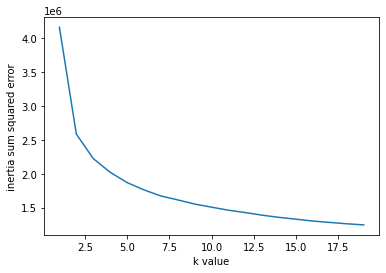

In [31]:
determine_K(scaled_data_encoded)

Dari kurva inersia di atas, dengan menggunakan elbow method, didapat bahwa k optimal adalah 2.

Sekarang bisa dilakukan proses klasterisasi k-means dengan k=2.
Untuk fungsi kmeans sudah dideklarasikan di atas. Agar lebih mudah, maka fungsi kmeansnya dibuat lagi.

alasan saya membuat kembali fungsi kmeans adalah karena fungsi kmeans pertama mengandung SCALER di dalam fungsi, sedangkan dataframe SCALED_DATA sudah terstandarisasi, maka dari itu dibuat KMEANS_SCRATCH_2.

In [32]:
def kmeans_scratch_2(df, k):
    X = np.array(df)
    
    #Initialize the centroids randomly
    init_centroids = random.sample(range(0, len(df)), k)
    
    centroids = []
    for i in init_centroids:
        centroids.append(df.loc[i])
    centroids = np.array(centroids)
    
    #Calculate the euclidean distance
    def euclidean_dist(x1, x2):
        dis = (sum(x1-x2)**2)**0.5
        return dis
    
    #Find the closest data to  centroids
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in centroids:
            distance.append(euclidean_dist(i,j))
        assigned_centroid.append(np.argmin(distance))
        
    get_closets_to_centroids = assigned_centroid
    
    #Move the centroids based on the mean of the data points
    new_centroids=[]
    cluster_df = pd.concat([X_train_imputed.drop(['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm'],axis=1), scaled_data[['ArahAnginTerkencang', 'ArahAngin9am', 'ArahAngin3pm']], pd.DataFrame(get_closets_to_centroids, columns=['cluster'])], axis=1)
    
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    
    return cluster_df, new_centroids

Saya akan membuat dataframe baru dengan cara menghapus kolom 'cluster' dari data scaled_data.
Kolom 'cluster' dihapus karena tidak akan dibutuhkan dalam perhitungan k-means nanti, kolom 'cluster' tersebut hanyalah 
untuk keperluan memprediksi data yang kosong pada data.

In [33]:
data_ready_to_clustered = scaled_data_encoded.drop(['cluster'], axis=1)

In [42]:
cluster_df = kmeans_scratch_2(df=data_ready_to_clustered, k=2)[0]

C:\Users\AHNAFB~1\AppData\Local\Temp/ipykernel_7200/3687369014.py:33: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_mean = current_cluster.mean(axis=0)


In [43]:
cluster_df = pd.concat([train[['Tanggal', 'KodeLokasi', 'BersaljuHariIni', 'BersaljuBesok']], cluster_df], axis=1)

In [44]:
cluster_df.head()

,Tanggal,KodeLokasi,BersaljuHariIni,BersaljuBesok,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,...,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,ArahAnginTerkencang,ArahAngin9am,ArahAngin3pm,cluster
0,01/06/2014,C4,Ya,Tidak,10.4,15.5,4.8,1.938730,4.128629,24.000000,...,1020.10000,1018.500000,6.112358,5.710934,13.1,15.0,WSW,N,WSW,0
1,15/07/2014,C10,Ya,Ya,9.0,17.0,8.0,2.600000,7.400000,41.040419,...,1015.20000,1014.600000,7.000000,5.000000,11.9,15.5,W,SW,WNW,0
2,16/02/2011,C46,Tidak,Tidak,18.2,32.0,0.0,8.111442,9.894893,44.000000,...,1015.62124,1012.662317,3.568597,3.606215,23.8,29.6,ESE,SE,SE,1
3,08/08/2012,C36,Tidak,Tidak,7.3,24.5,0.0,8.400000,10.400000,54.000000,...,1019.20000,1016.900000,1.000000,7.000000,15.3,23.2,SSW,N,SW,0
4,29/10/2016,C7,Tidak,Tidak,5.9,20.3,0.0,3.600000,12.600000,37.000000,...,1019.70000,1014.700000,2.000000,6.000000,12.4,18.1,N,NNW,ESE,0


In [45]:
cluster_0 = cluster_df.loc[cluster_df['cluster'] == 0]
cluster_0.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.000000,47744.0
mean,7.570988,19.667176,0.982500,3.406329,7.348694,34.319517,10.559566,14.824708,70.823333,49.358545,1019.382103,1016.775833,3.812855,4.090149,12.808011,18.462158,0.0
std,4.615648,5.804216,2.966278,2.490916,3.334623,11.822838,7.178102,7.150132,18.822466,19.269130,6.985880,6.837009,2.523441,2.338559,5.013703,5.777990,0.0
min,-10.287167,-4.800000,-5.430151,-4.786630,-3.176074,7.000000,-2.122839,0.000000,1.000000,1.000000,982.200000,977.100000,-2.448394,0.000000,-7.200000,-5.400000,0.0
25%,4.500000,15.700000,0.000000,1.600000,5.096934,26.000000,6.000000,9.000000,58.000000,36.000000,1015.700000,1013.000000,1.338424,2.021021,9.500000,14.500000,0.0
50%,7.700000,19.200000,0.000000,3.100103,7.800000,33.000000,9.000000,15.000000,72.000000,48.000000,1019.700000,1017.154369,3.755430,4.000000,12.700000,18.000000,0.0
75%,10.700000,23.300000,0.200000,4.861633,9.900000,41.000000,15.000000,19.000000,86.000000,61.324235,1023.600000,1020.900000,6.000000,6.000000,16.100000,22.100000,0.0
max,25.100000,42.200000,73.400000,24.000000,15.726914,113.000000,50.000000,56.000000,112.933121,100.757714,1040.600000,1039.600000,9.626811,10.211991,32.500000,40.700000,0.0


In [48]:
print(cluster_0['BersaljuHariIni'].value_counts())
print(cluster_0['BersaljuBesok'].value_counts())

Tidak    39309
Ya        7646
Name: BersaljuHariIni, dtype: int64
Tidak    38832
Ya        8097
Name: BersaljuBesok, dtype: int64


In [46]:
cluster_1 = cluster_df.loc[cluster_df['cluster'] == 1]
cluster_1.describe()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,cluster
count,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.000000,61351.0
mean,15.802481,25.976435,3.504628,6.392901,7.445737,44.082254,16.767578,21.665568,67.517944,53.423824,1016.426172,1014.194200,4.840578,4.814489,20.203688,24.223706,1.0
std,5.094112,6.755179,10.906507,3.968718,3.593746,13.183740,9.133650,8.749990,18.926859,21.606039,6.333766,6.412101,2.475527,2.329303,5.581036,6.724767,0.0
min,-5.200000,-2.200000,-4.001882,-2.249502,-3.563671,7.000000,0.000000,0.000000,-93.036898,-72.236249,980.500000,979.000000,-2.403811,-3.816632,-5.200000,-3.800000,1.0
25%,12.200000,21.000000,0.000000,4.000000,4.800000,35.000000,11.000000,15.000000,57.000000,38.000000,1012.400000,1009.900000,3.000000,3.000000,16.200000,19.300000,1.0
50%,15.800000,25.800000,0.000000,5.863871,7.632627,43.000000,17.000000,20.000000,69.000000,55.000000,1016.400000,1014.100000,5.141034,5.000000,20.200000,24.000000,1.0
75%,19.500000,30.900000,2.000000,8.000000,10.400000,52.000000,22.000000,28.000000,81.000000,68.481143,1020.200000,1018.100000,7.000000,7.000000,24.200000,29.100000,1.0
max,33.900000,47.300000,371.000000,145.000000,22.061849,137.495539,130.000000,87.000000,114.028528,100.000000,1041.000000,1038.500000,10.618841,12.167517,40.200000,46.700000,1.0


In [49]:
print(cluster_1['BersaljuHariIni'].value_counts())
print(cluster_1['BersaljuBesok'].value_counts())

Tidak    43361
Ya       16348
Name: BersaljuHariIni, dtype: int64
Tidak    43869
Ya       15866
Name: BersaljuBesok, dtype: int64
